# Clustering

# k-means
-　最も基本的なクラスタリングアルゴリズム　（教師なし学習）
- データをk個のクラスタに分類する
- クラスタ内の分散の合計が全体で最小になるようにする
- 1、ランダムにそれぞれのデータに対して1〜kのクラスタに振り分ける
- 2、クラスタが変更しなくなるまで以下を繰り返す
- 2-1　各クラスタの中心を求める
- 2-2　最も近いクラスタの中心をそのデータのクラスタとする

# クラスタ数kの求め方
- （当然）データ数よりも少ない必要がある
- ドメイン知識やデータの背景から仮説を立てる
-　正解はない
- 色々なkを試して考察するのが一番
- Elbow method　を使う。kを増やしていき損失が急に下がったkを採用する
- 必ずしもElbowがあるとは限らない

# k-meansの注意点
- 特徴量の数が多い（高次元空間）場合は2組のデータ間の距離に差がなくなっていくので、うまくクラスタリングできなくなる。（次元の呪い）　＝＞特徴量選択やPCAで次元削減する
- 質的変数との相性が悪い　＝＞量的変数のみでk-meansをしたり、k-modesなどの別のアルゴリズムを使用
- ダミー変数化して距離を計算しても距離の意味を持たない　
- 高次元化しやはりデータ間の距離がなくなっていく

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
X = df.drop(columns=['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.preprocessing import StandardScaler
# 標準化
X_scaled = StandardScaler().fit_transform(X)

# K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)
labels

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# データの分布を描画
# concatを使ってデータを合体させている。
result_df = pd.concat([X, pd.DataFrame(labels, columns=['kmeans_result'])], axis=1)

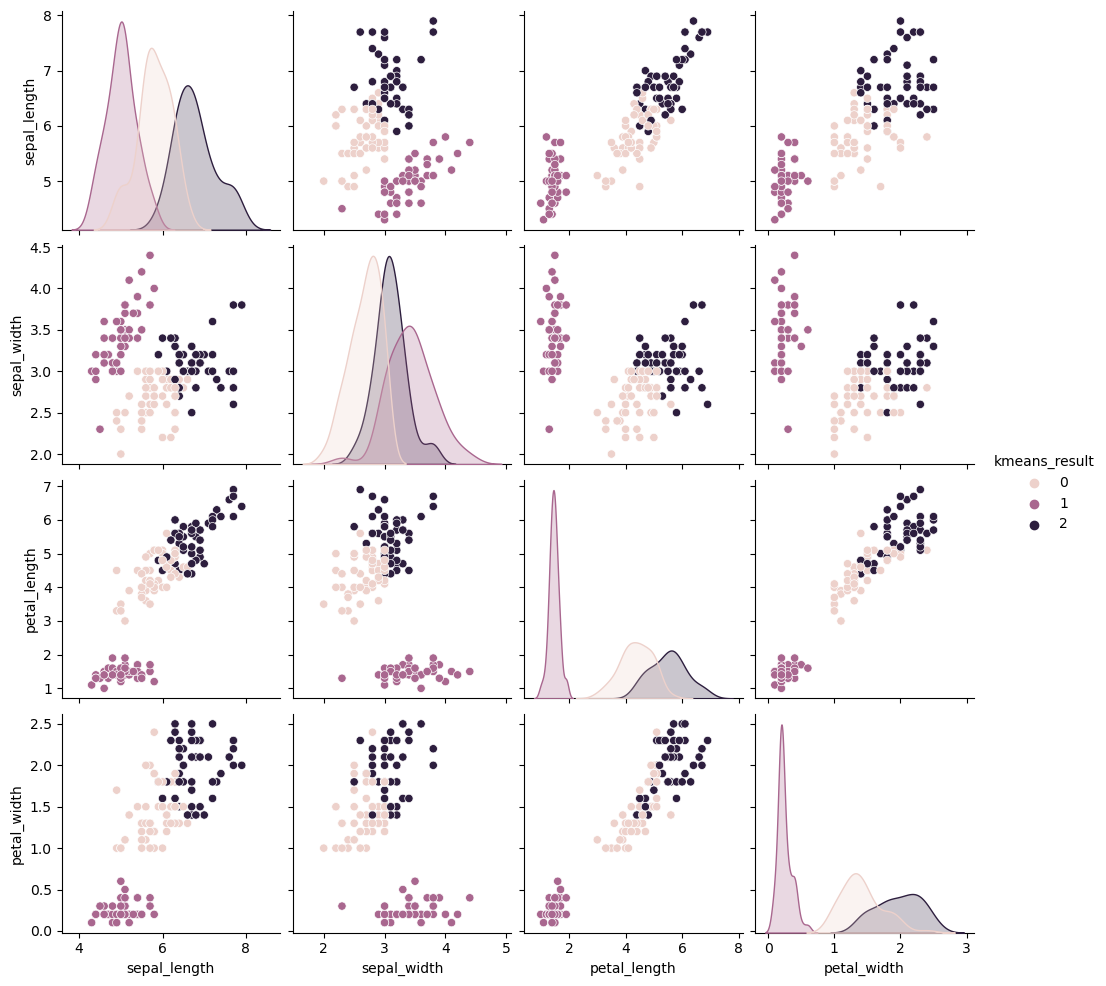

In [6]:
sns.pairplot(result_df, hue='kmeans_result')
# kmeansラベル

In [7]:
sns.pairplot(df, hue='species')
# 正解ラベル

In [21]:
losses = []

for K in range(1, 10):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    losses.append(-kmeans.score(X))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

In [22]:
losses

[681.3706000000001,
 152.3479517603579,
 78.851441426146,
 57.228473214285714,
 46.472230158730156,
 39.03998724608724,
 34.299712121212124,
 30.06311061745273,
 28.271721728563836]

In [31]:
plt.plot(range(1, 10), losses)
plt.xlabel('K')
plt.xlabel('loss')

Text(0.5, 0, 'loss')

# 階層クラスタリング

- k-meansと双璧をなす有名クラスタリング手法
- 事前にクラスタ数（k）を指定する必要がない
- dendorogram（樹状図）を作り、’階層的’にクラスタリングする
- 1（初期設定）各データを各クラスタとする
- 2距離が最も近いクラスタ同士を融合し一つのクラスタにする
- 3、2を繰り返す
- 4最終的にクラスが一つになり終了
- データは事前に標準化しておく必要があり

## ward(ウォード法)
- 全データの中心から各データの距離の二乗和(分散)から、それぞれのクラスタの中心とそのクラスタ内のデータの距離の二乗和を引いた値
- 計算量が多いが分類の感度がいいのでよく使われる

## 類似度（距離）の定義
- ユークリッド距離
- マンハッタン距離

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_scaled, method='ward')

In [33]:
d = dendrogram(Z, truncate_mode='lastp', p=10)

## クラスタの分布描画

In [34]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, criterion='maxclust', t=3)

In [35]:
hc_result = pd.concat([X, pd.DataFrame({'cluster': clusters})], axis=1)

In [36]:
sns.pairplot(hc_result, hue='cluster')

In [37]:
sns.pairplot(df, hue='species')